In [31]:
# #import the latest dataset from Kaggle
# import kagglehub

# # Download latest version of the dataset
# dataset_name = "blastchar/telco-customer-churn"
# path = kagglehub.dataset_download(dataset_name)

# print("Path to dataset files:", path)
# #Path to dataset files: C:\Users\comat\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [33]:
file_path = r"C:\Users\comat\GitProjects\customer-churn-ai\data\Raw-Telco-Customer-Churn-w-Review.csv"

# Ensure the file exists and load the data; # Troubleshoot: encoding
try:
    df = pd.read_csv(file_path) #, encoding='latin1')
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Data loaded successfully.


Intitial Inspection

In [34]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_review
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Really happy with my plan... no unexpected fee...
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Really happy with my plan... phone support was...
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,"Unfortunately, my service was... frustrated by..."


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [36]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
customer_review     0
dtype: int64

In [37]:
df.duplicated().sum()

np.int64(0)

---
#### **Initial Clean**

In [38]:
# --- Rename Column ---
if 'customer_review' in df.columns:
    df = df.rename(columns={'customer_review': 'CustomerReview'})
    print("Column 'customer_review' successfully renamed to 'CustomerReview'.")

    # --- Verify the change ---
    print("Updated columns:", df.columns.tolist())
    # print(df.head()) # Uncomment to see the first few rows with the new header
else:
    print("Error: Column 'customer_review' not found in the DataFrame. Please check the column name exists and verify the correct data is loaded.")

Column 'customer_review' successfully renamed to 'CustomerReview'.
Updated columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'CustomerReview']


In [39]:
# Some columns may have whitespace or inconsistent values
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [40]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [42]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
CustomerReview       0
dtype: int64

In [43]:
# Check for missing values
null_count_TotalCharges__original = df["TotalCharges"].isnull().sum()
print(null_count_TotalCharges__original)

11


In [44]:
if null_count_TotalCharges__original > 0:
    df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean()) # inplace=True)

print(f"TotalCharges Null Values - Original Data: ", null_count_TotalCharges__original)   # Check for missing values
print(f"TotalCharges Null Values - Cleaned Data: ", df["TotalCharges"].isnull().sum())    # Check for missing values again

TotalCharges Null Values - Original Data:  11
TotalCharges Null Values - Cleaned Data:  0


---
#### **Initial Statistics and Distributions**

In [45]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [46]:
# Check the distribution of Churn counts
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [47]:
# Check the distribution of Churn counts as a percentage
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

---
#### **Quick Data Viz**

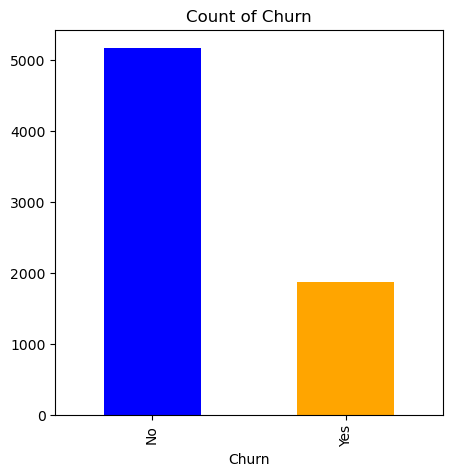

In [48]:
df['Churn'].value_counts().sort_index().plot(kind='bar', title='Count of Churn', figsize=(5,5), color=['blue', 'orange']);

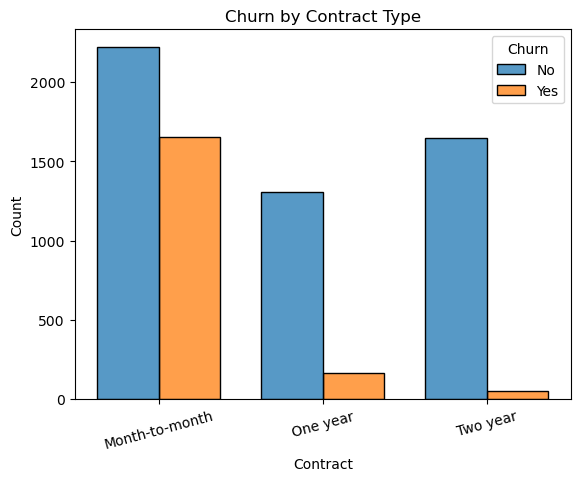

In [49]:
#### Plot churn distribution:
# Churn rate by Contract type
sns.histplot(data=df, x='Contract', hue='Churn', multiple="dodge", shrink=.75)
plt.title("Churn by Contract Type")
plt.xticks(rotation=15)
plt.show()

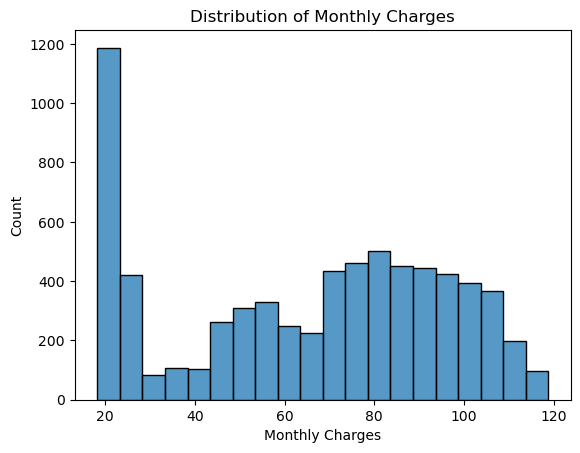

In [50]:
# Histogram of Monthly Charges
sns.histplot(data=df, x="MonthlyCharges", bins=20)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.show()

In [51]:
overall_churn_rate = df["Churn"].value_counts(normalize=True).get("Yes", 0) * 100
print(f"Overall Churn Rate: {overall_churn_rate:.2f}%")

Overall Churn Rate: 26.54%


In [52]:
churn_by_contract = df.groupby("Contract")["Churn"].value_counts(normalize=True).unstack()["Yes"] * 100
print(churn_by_contract)
#churn_by_contract.plot(kind='bar', color=['blue', 'orange'])

Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Yes, dtype: float64


## 📌 Observations
- Churn rate is approximately 26.54%.
- Churn by Contract Type:    

| Contract | Churn % by Contract |
|-----------------|--------------|
| Month-to-month  | 42.709677    |
| One year        | 11.269518    |
| Two year        | 2.831858     |
- Month-to-month customers churn more frequently.
- Cleaned `TotalCharges` column for missing data.
- Dataset contains many categorical features that will need encoding.

---
##### Analyze Outliers

In [53]:
def analyze_outliers_iqr(df, columns=None):
    """
    Analyzes outliers in specified numerical columns of a DataFrame using the IQR method.
    Args:
        df (pd.DataFrame): The input DataFrame.
        columns: A list of column names to analyze. If None, all numerical columns will be analyzed.
    Returns:
        pd.DataFrame: A DataFrame summarizing outlier information for each analyzed column.
    """
    if columns is None:
        # If no columns specified, select only numerical columns from the DataFrame
        columns_to_process = df.select_dtypes(include=np.number).columns.tolist()
    else:
        # Filter the provided columns to include only those that are numerical and exist in the df
        columns_to_process = [col for col in columns if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]
        
        # Notify about non-numerical columns if any were specified and skipped
        skipped_columns = [col for col in columns if col not in columns_to_process and col in df.columns]
        if skipped_columns:
            print(f"Warning: The following non-numerical columns were specified but skipped: {skipped_columns}")
            
        # Notify about columns not found if any were specified
        not_found_columns = [col for col in columns if col not in df.columns]
        if not_found_columns:
             print(f"Error: The following specified columns were not found in the DataFrame: {not_found_columns}")


    results = []
    
    if not columns_to_process:
        print("No numerical columns found or specified to analyze.")
        return pd.DataFrame(results) # Return an empty DataFrame

    for column_name in columns_to_process:
        series = df[column_name]
        
        # Ensure the series is not all NaN, which would cause quantile to fail
        if series.isnull().all():
            print(f"Warning: Column '{column_name}' contains all NaN values. Skipping.")
            results.append({
                'Column': column_name, 'Q1': np.nan, 'Q3': np.nan, 'IQR': np.nan,
                'Lower Bound': np.nan, 'Upper Bound': np.nan, 'Lower Outliers': 0,
                'Upper Outliers': 0, 'Total Outliers': 0, 'Outlier %': 0
            })
            continue

        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        lower_outliers = series[series < lower_bound]
        upper_outliers = series[series > upper_bound]
        
        lower_count = len(lower_outliers)
        upper_count = len(upper_outliers)
        total_count = lower_count + upper_count
        
        results.append({
            'Column': column_name,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Lower Outliers': lower_count,
            'Upper Outliers': upper_count,
            'Total Outliers': total_count,
            'Outlier %': (total_count / len(series)) * 100 if len(series) > 0 else 0
        })
    
    if not results: # Should not happen if columns_to_process had items, but as a safeguard
        return pd.DataFrame()
        
    return pd.DataFrame(results).set_index('Column')

In [54]:
outlier_summary = analyze_outliers_iqr(df)
print(outlier_summary)

                     Q1       Q3       IQR  Lower Bound  Upper Bound  \
Column                                                                 
SeniorCitizen     0.000     0.00     0.000       0.0000       0.0000   
tenure            9.000    55.00    46.000     -60.0000     124.0000   
MonthlyCharges   35.500    89.85    54.350     -46.0250     171.3750   
TotalCharges    402.225  3786.60  3384.375   -4674.3375    8863.1625   

                Lower Outliers  Upper Outliers  Total Outliers  Outlier %  
Column                                                                     
SeniorCitizen                0            1142            1142  16.214681  
tenure                       0               0               0   0.000000  
MonthlyCharges               0               0               0   0.000000  
TotalCharges                 0               0               0   0.000000  


No outliers. SeniorCitizen is a binary categorical variable, so it's treated numerically. It's